In [2]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import random
import torch

In [2]:
img_path = 'D:/Soyeon/Project/MARCO/folderID49_plateID1049_batchID2121_wellNum83_profileID1_d1_r47002_ef.jpg'

In [3]:
image =plt.imread(img_path)

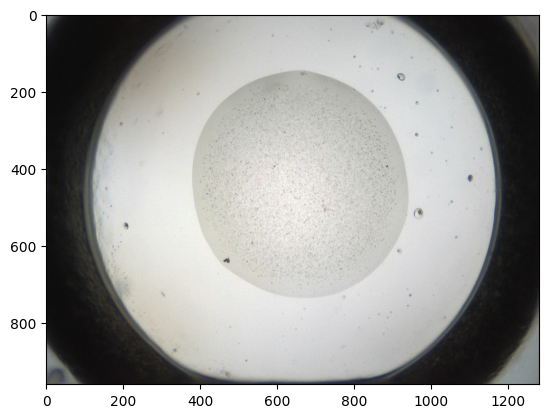

In [4]:
plt.imshow(image)

In [5]:
image.shape

(960, 1280, 3)

CSV 파일의 열 이름: Index(['Unnamed: 0', 'image_path', 'label', 'filename', 'width', 'height',
       'source_id', 'label_text', 'source', 'label_id'],
      dtype='object')


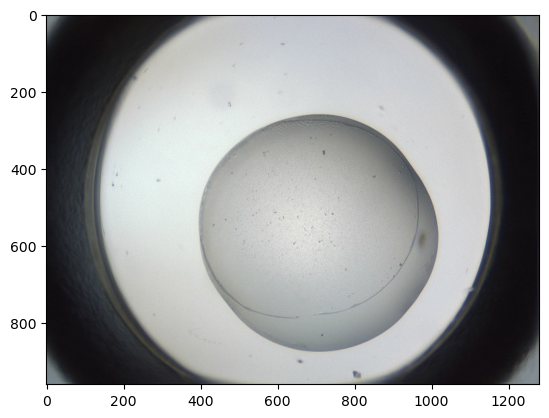

In [3]:
# CSV 파일 경로
csv_file = r"C:\Users\BDA_INT01\Desktop\Soyeon Lee\Project\metadata_R.csv"

# CSV 파일 읽기
df = pd.read_csv(csv_file)

# 메타데이터 열 확인
print("CSV 파일의 열 이름:", df.columns)

# 이미지 로드 함수
def load_image(image_path):
    img = plt.imread(image_path)
    return img

# 임의의 이미지 선택 및 로드
def load_random_image(dataframe):
    image_paths = dataframe['image_path'].tolist()
    random_path = random.choice(image_paths)
    
    if os.path.exists(random_path):
        image = load_image(random_path)
        return plt.imshow(image)

# 실행
random_image = load_random_image(df)


In [7]:
df.head()

image_path        label  \
0  C:\Users\BDA_INT01\Desktop\Soyeon Lee\Project\...        Clear   
1  C:\Users\BDA_INT01\Desktop\Soyeon Lee\Project\...  Precipitate   
2  C:\Users\BDA_INT01\Desktop\Soyeon Lee\Project\...        Clear   
3  C:\Users\BDA_INT01\Desktop\Soyeon Lee\Project\...        Clear   
4  C:\Users\BDA_INT01\Desktop\Soyeon Lee\Project\...  Precipitate   

                                            filename  width  height  \
0  folderID618_plateID2618_batchID13235_wellNum66...   1280     960   
1  folderID501_plateID3501_batchID20639_wellNum73...   1280     960   
2  folderID253_plateID3253_batchID18507_wellNum59...   1280     960   
3                       06cs_N3_ImagerDefaults_1.jpg   1280     960   
4  folderID350_plateID2350_batchID11073_wellNum50...   1224    1024   

   source_id   label_text  
0          3        Clear  
1          3  Precipitate  
2          3        Clear  
3          1        Clear  
4          3  Precipitate

In [8]:
#소스명 매핑
source_mapping = {
    0: "C3",
    1: "GSK",
    2: "HWI",
    3: "Merck",
    4: "BMS"
}

# 새로운 열 추가 (source)
df['source'] = df['source_id'].map(source_mapping)

df.head()

label_mapping = {
    0: 'Clear',
    1: 'Crystals',
    2:	'Other',
    3: 	'Precipitate'

}

# label_mapping = {i : v for i, v in enumerate(df.label.unique())}


In [9]:
label_mapping

{0: 'Clear', 1: 'Crystals', 2: 'Other', 3: 'Precipitate'}

In [11]:
label_mapping_reverse = {v : k for k,v in label_mapping.items()}
label_mapping_reverse

df['label_id'] = df['label'].map(label_mapping_reverse)

df.head()  

csv_path = "./metadata_test_R.csv"
df.to_csv(csv_path, index = True)

In [11]:
print(f"전체 데이터 개수: {len(df)}")

전체 데이터 개수: 415775


레이블별 데이터 개수:label
Precipitate    199567
Clear          139865
Crystals        53044
Other           23299
Name: count, dtype: int64
소스별 데이터 개수:source
Merck    257889
GSK       70248
HWI       67225
C3        13111
BMS        7302
Name: count, dtype: int64


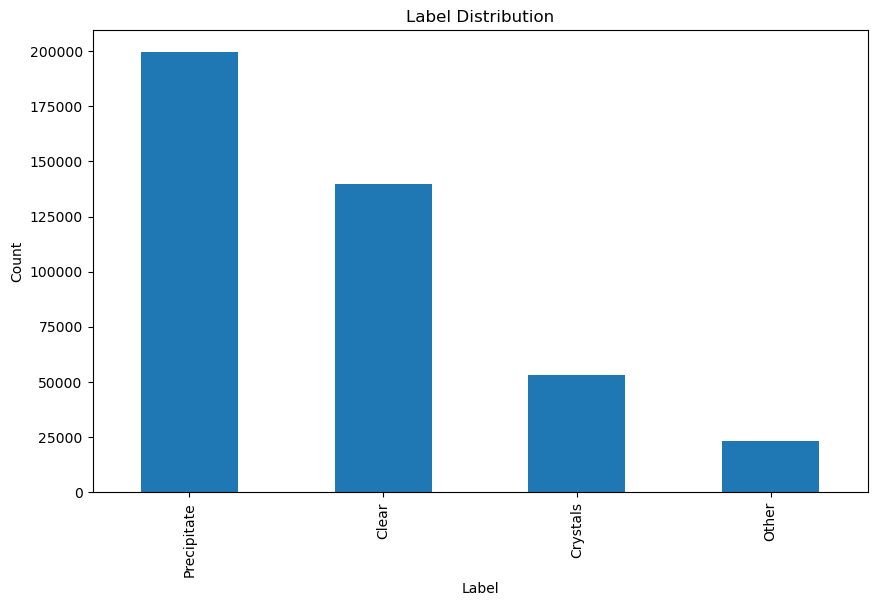

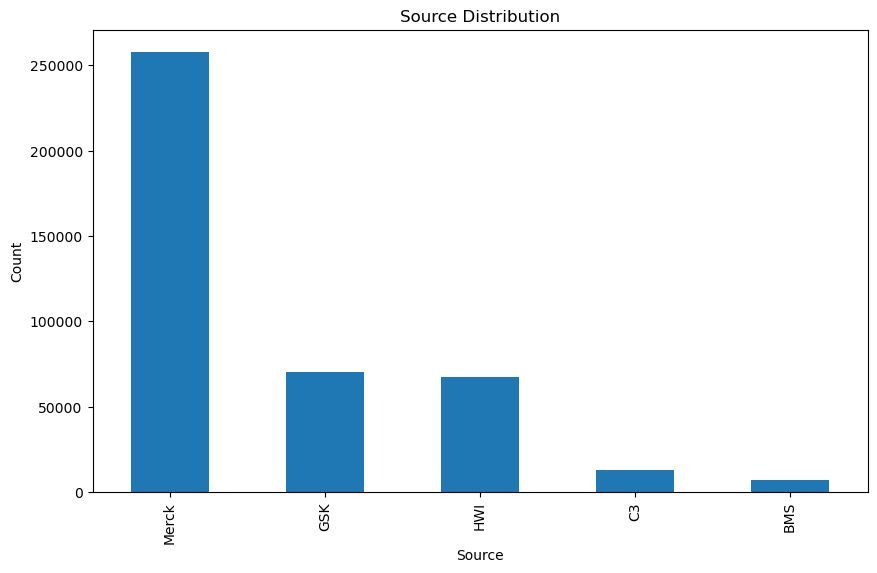

In [4]:
# 클래스 분포 확인
label_counts = df['label'].value_counts()
source_counts = df['source'].value_counts()
print(f"레이블별 데이터 개수:{label_counts}")
print(f"소스별 데이터 개수:{source_counts}")

# 클래스 분포 시각화
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#소스 분포 시각화
plt.figure(figsize=(10,6))
source_counts.plot(kind='bar')
plt.title("Source Distribution")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

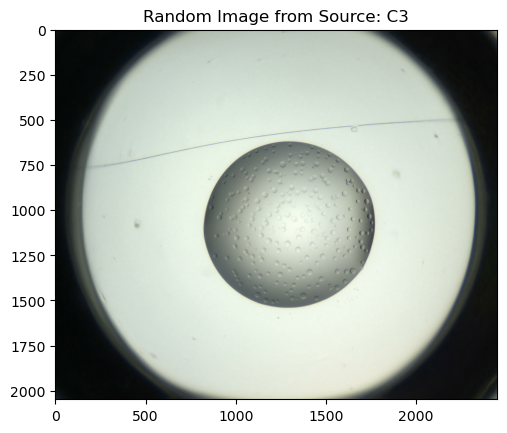

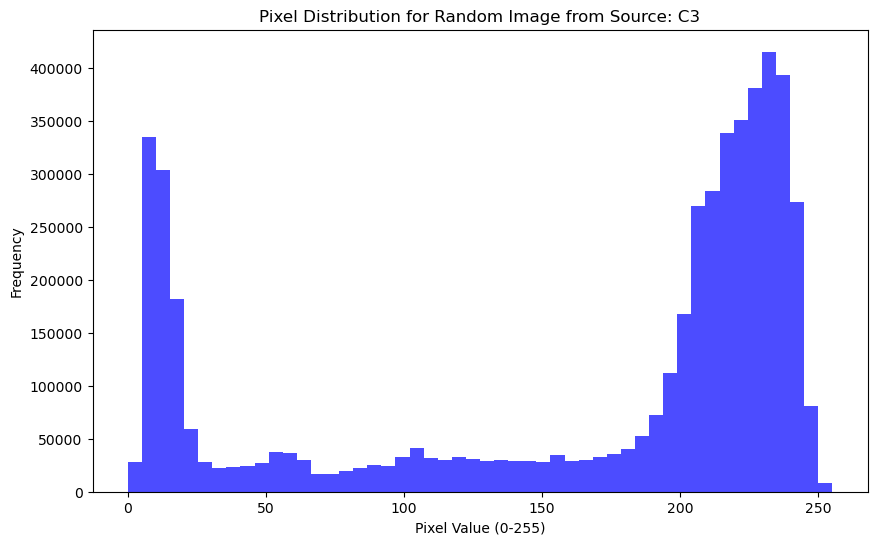

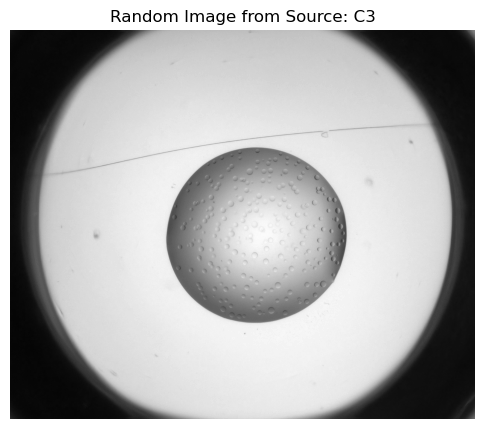

In [13]:
# 랜덤 이미지 선택 및 픽셀 분포 시각화 함수
def plot_random_image_pixel_distribution(dataframe, source_name):
    # 지정된 소스의 이미지 필터링
    source_images = dataframe[dataframe['source'] == source_name]['image_path']
    
    # 랜덤으로 이미지 하나 선택
    random_image_path = random.choice(source_images.tolist())

    img= plt.imread(random_image_path)
    plt.imshow(img)
    plt.title(f"Random Image from Source: {source_name}")

     # 이미지 로드
    img = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
    # 픽셀 분포 시각화
    plt.figure(figsize=(10, 6))
    plt.hist(img.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Pixel Distribution for Random Image from Source: {source_name}")
    plt.xlabel("Pixel Value (0-255)")
    plt.ylabel("Frequency")

    plt.show()

    # 선택된 이미지 확인
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Random Image from Source: {source_name}")
    plt.show()

# 예시 실행: 특정 소스의 랜덤 이미지 픽셀 분포 그리기
plot_random_image_pixel_distribution(df, "C3")  # 소스명을 지정

#기관별 랜덤 이미지가 아니라 전체 이미지로 봐야 하나...

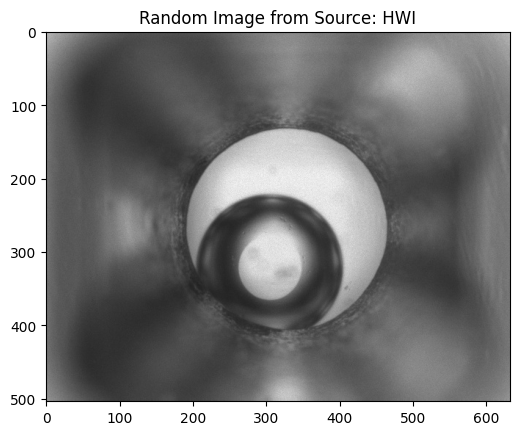

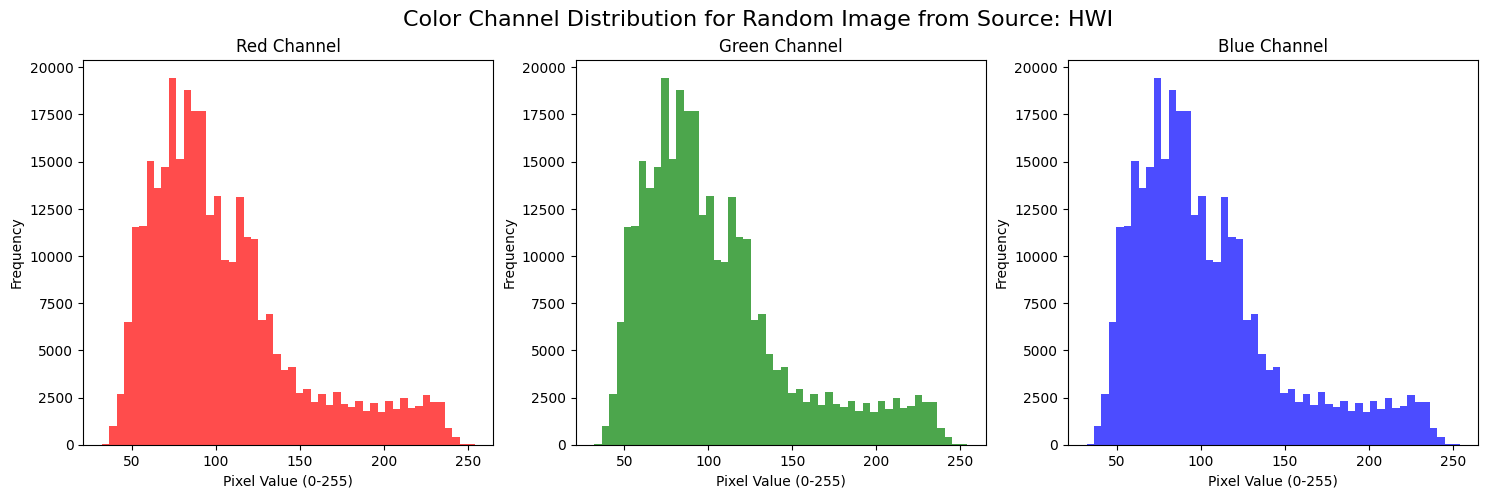

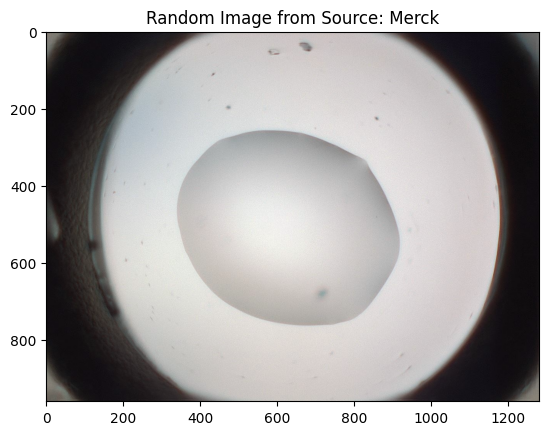

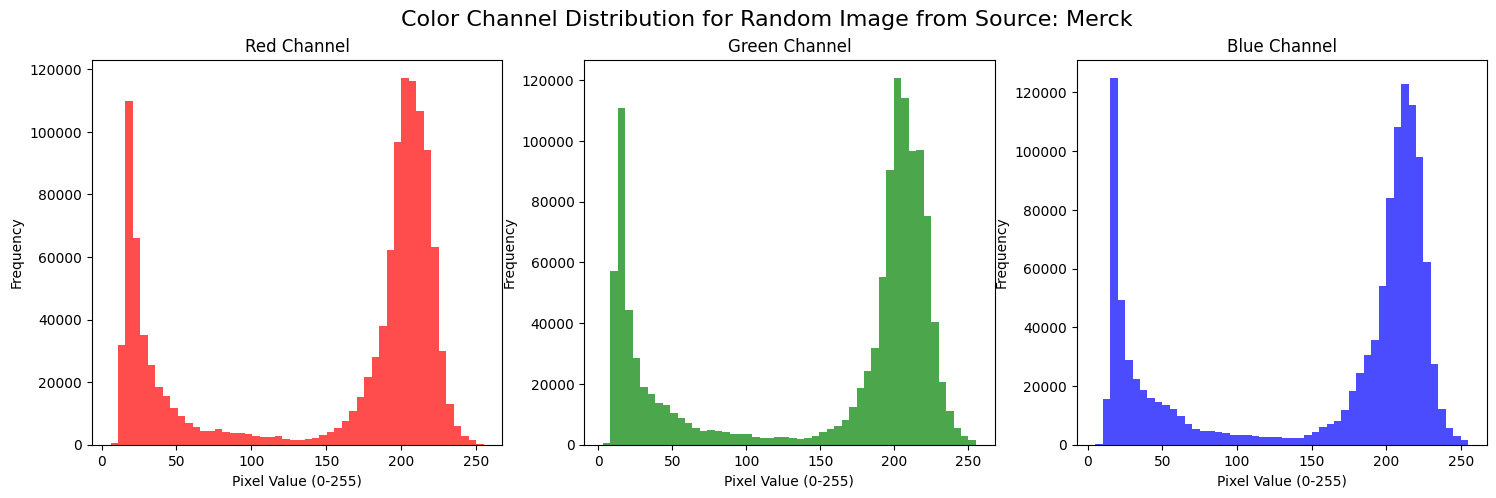

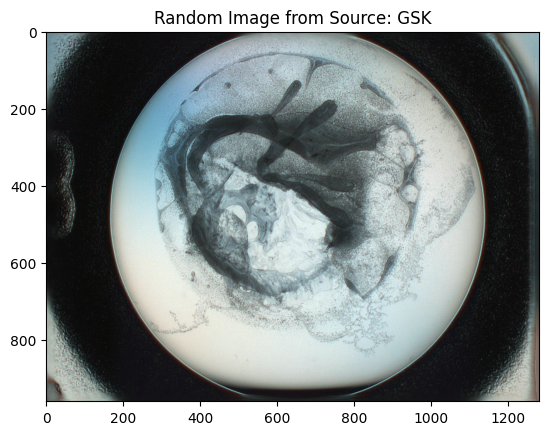

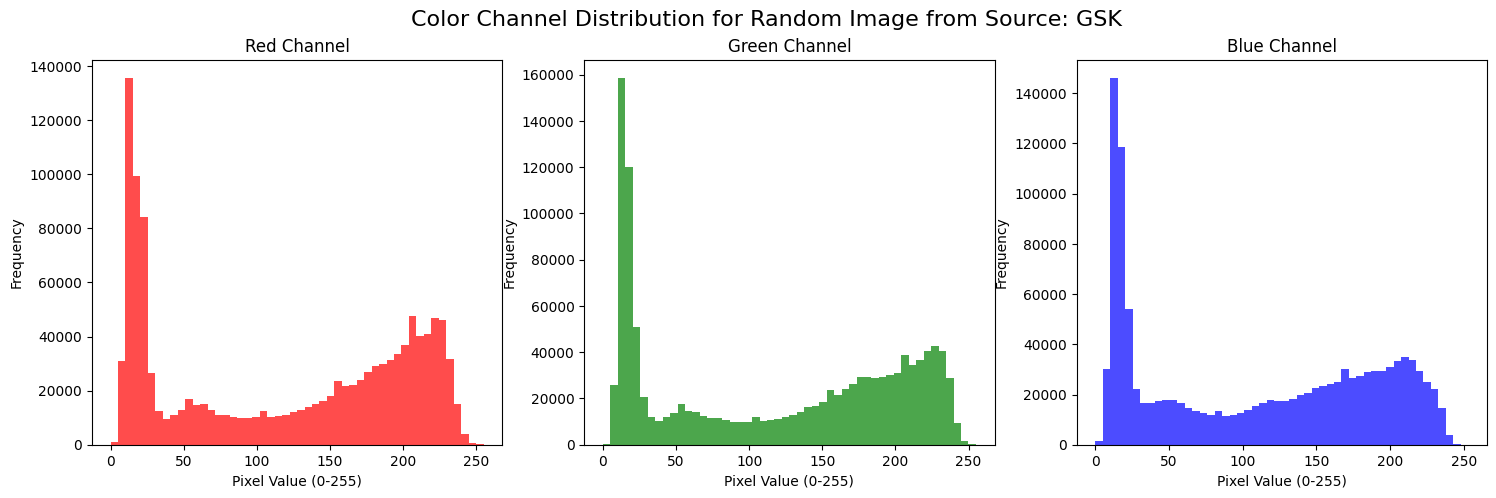

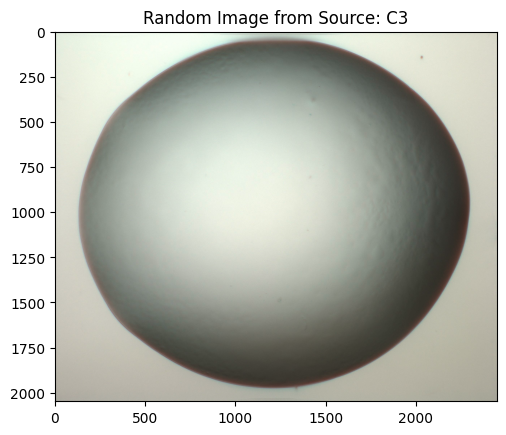

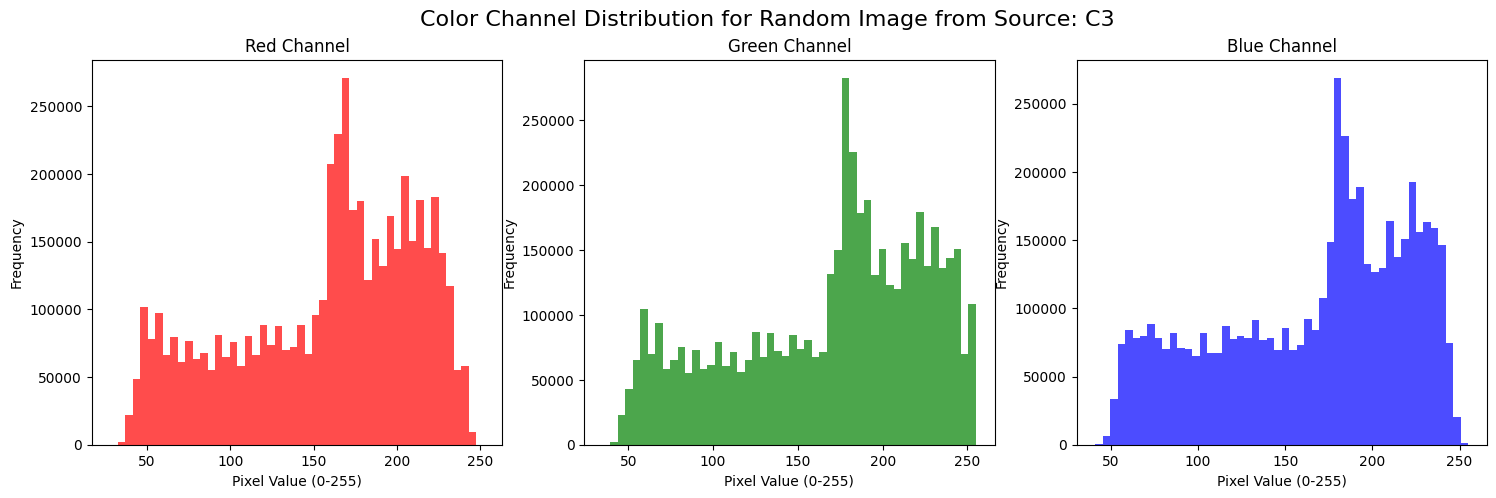

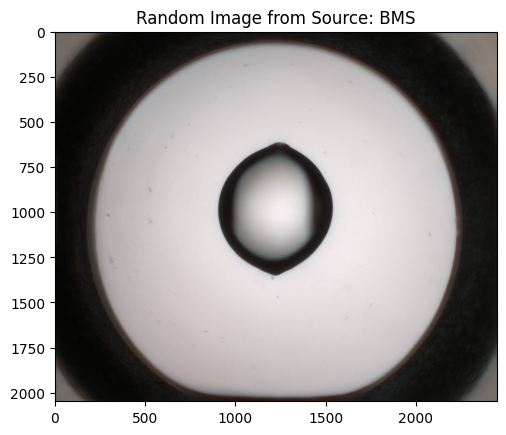

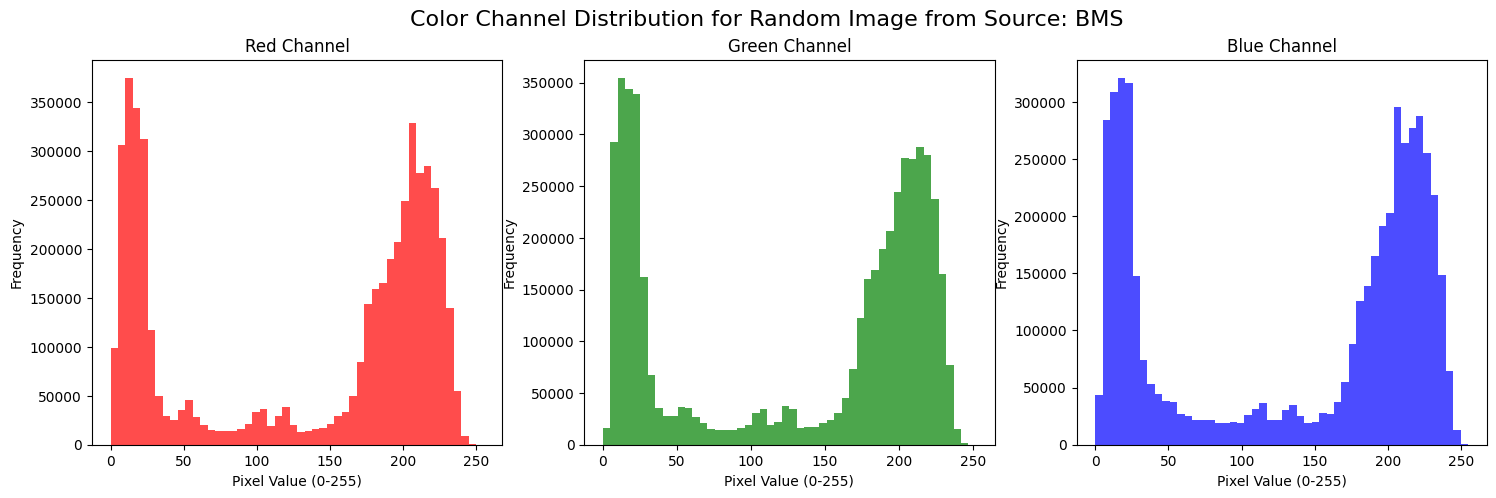

In [14]:
# Function to Plot RGB Distribution of a Random Image per Source

def plot_random_image_rgb_distribution_by_source(dataframe):
    sources = dataframe['source'].unique()

    for i in sources:
        # Filter images for the current source
        source_images = dataframe[dataframe['source'] == i]['image_path']
    
        # Select a random image from the source
        random_image_path = random.choice(source_images.tolist())
    
        # Read image as RGB
        img = cv2.imread(random_image_path)
        plt.imshow(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.title(f"Random Image from Source: {i}")

        # Extract RGB channels
        red_channel = img[:, :, 0].flatten()
        green_channel = img[:, :, 1].flatten()
        blue_channel = img[:, :, 2].flatten()

        # Plot Distributions
        plt.figure(figsize=(18, 5))
        plt.suptitle(f"Color Channel Distribution for Random Image from Source: {i}", fontsize=16)

        plt.subplot(1, 3, 1)
        plt.hist(red_channel, bins=50, color='red', alpha=0.7)
        plt.title("Red Channel")
        plt.xlabel("Pixel Value (0-255)")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 2)
        plt.hist(green_channel, bins=50, color='green', alpha=0.7)
        plt.title("Green Channel")
        plt.xlabel("Pixel Value (0-255)")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.hist(blue_channel, bins=50, color='blue', alpha=0.7)
        plt.title("Blue Channel")
        plt.xlabel("Pixel Value (0-255)")
        plt.ylabel("Frequency")
        
        plt.show()

# Execute Function
plot_random_image_rgb_distribution_by_source(df)

#기관별 랜덤 이미지가 아니라 전체 이미지로 봐야 하나...


Mean: ['0.4978', '0.4962', '0.4875']
Std: ['0.2797', '0.2783', '0.2717'] -> ImageNet걸로 사용하자.

In [15]:
from pathlib import Path
ROOT_DIR= Path(r"D:\Soyeon\Project\MARCO")

df['image_path'] = df['filename'].apply(lambda x : os.path.join(ROOT_DIR, x))


In [16]:
df.image_path.iloc[0]

'D:\\Soyeon\\Project\\MARCO\\X0000039760279200409281034.png'

In [17]:
df.iloc[0, 0]

'D:\\Soyeon\\Project\\MARCO\\X0000039760279200409281034.png'

In [18]:
import torch
from PIL import Image
from pathlib import Path
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.transforms import v2
import torch.nn.functional as F
import torchvision

transform = transforms.Compose([
    # transforms.ToPILImage(), 
    transforms.RandomResizedCrop(448, scale=(0.6, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),  # 좌우 뒤집기
    transforms.RandomVerticalFlip(p=0.5),    # 상하 뒤집기
    transforms.RandomRotation(degrees=35),   # 랜덤 회전
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 색상 변형
    transforms.Resize(size=(224, 224)),  # 마지막에 모델 입력 크기로 Resize
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #ImageNet 평균과 표준편차
])

# CutMix와 MixUp 정의
NUM_CLASSES = len(label_mapping)  # 클래스 개수 자동 설정
cutmix = v2.CutMix(num_classes=NUM_CLASSES)
mixup = v2.MixUp(num_classes=NUM_CLASSES)
cutmix_or_mixup = v2.RandomChoice([cutmix, mixup])

#normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Custom Dataset 클래스
class CustomDataset(Dataset):
    def __init__(self, df, image_path_col : str = 'image_path', label_col  = 'label_id', source_col = 'source_id', transform=None):
        super().__init__()
        self.df = df
        self.image_path_col = image_path_col
        self.label_col = label_col
        self.source_col = source_col
        self.transform = transform #데이터 증강

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # 이미지 경로 및 레이블 가져오기
        row = self.df.iloc[idx]
        img_path = row[self.image_path_col]  # CSV 첫 번째 열에서 경로 가져오기
        label_id = row[self.label_col]
        source_id = row[self.source_col]

        # # 이미지 로드 및 변환
        # image = cv2.imread(img_path)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 기본적으로 BGR로 읽음

        image = Image.open(img_path).convert('RGB')


        if self.transform is not None:
            image = self.transform(image)
        return image, torch.tensor(label_id, dtype=torch.long), torch.tensor(source_id, dtype=torch.long) 

# 데이터셋 생성
dataset_train = CustomDataset(df, transform=transform)

# DataLoader 생성 및 테스트
load_dataset = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)


# DataLoader에서 배치 증강 확인
for batch in load_dataset:
    images, labels, sources = batch  # DataLoader에서 (images, labels, sources) 튜플 언패킹

    print(f"Before CutMix/MixUp: images.shape = {images.shape}, labels.shape = {labels.shape}")

    # CutMix 또는 MixUp 적용 (labels는 정수형 상태여야 함)
    images, labels = cutmix_or_mixup(images, labels)

    # CutMix/MixUp 이후 원-핫 변환 필요 없음 (이미 혼합된 확률 형태)
    print(f"After CutMix/MixUp: images.shape = {images.shape}, labels.shape = {labels.shape}")
    
    break  # 첫 배치 확인 후 종료



Before CutMix/MixUp: images.shape = torch.Size([32, 3, 224, 224]), labels.shape = torch.Size([32])
After CutMix/MixUp: images.shape = torch.Size([32, 3, 224, 224]), labels.shape = torch.Size([32, 4])


In [19]:
df.dtypes

image_path    object
label         object
filename      object
width          int64
height         int64
source_id      int64
label_text    object
source        object
label_id       int64
dtype: object

In [20]:
 # random cropping -> data augemtation -> resize -> batch augmentation -> normalization

In [21]:
np.mean(image, axis=(0,1))

array([151.7864445 , 151.90957926, 149.21737467])

In [22]:
def convert_from_torch_to_numpy(image_tensor : torch.Tensor) -> np.ndarray :
    return image_tensor.numpy().transpose(1,2,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.4285715].


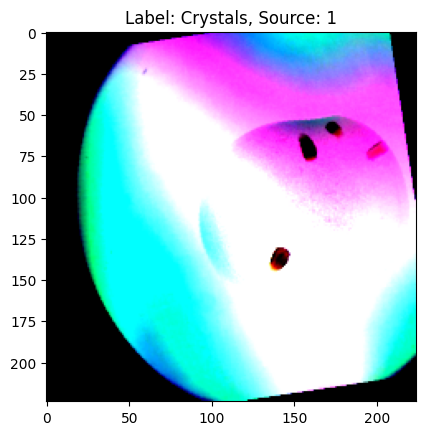

In [23]:
def visualize_dataset(dataset : CustomDataset, index : int) -> None :
    image, label, source = dataset[index]
    
    label_text = label_mapping.get(label.item())
    
    plt.title(label)
    plt.imshow(convert_from_torch_to_numpy(image))
    plt.title(f"Label: {label_text}, Source: {source.item()}")
    plt.show()



import random 
index = random.randint(0, len(df) - 1)
visualize_dataset(dataset_train, index)

In [24]:
#def visualize_batch(dataloader : DataLoader, index : int) -> None:
    # Get batch 
#    batch = dataloader[index]
    # Compute batvh size
#    batch_size = batch.shape[0]
    # Create a grid ...
#    fig, ax = plt.subplots() # ...

Before CutMix/MixUp: images.shape = torch.Size([32, 3, 224, 224]), labels.shape = torch.Size([32])


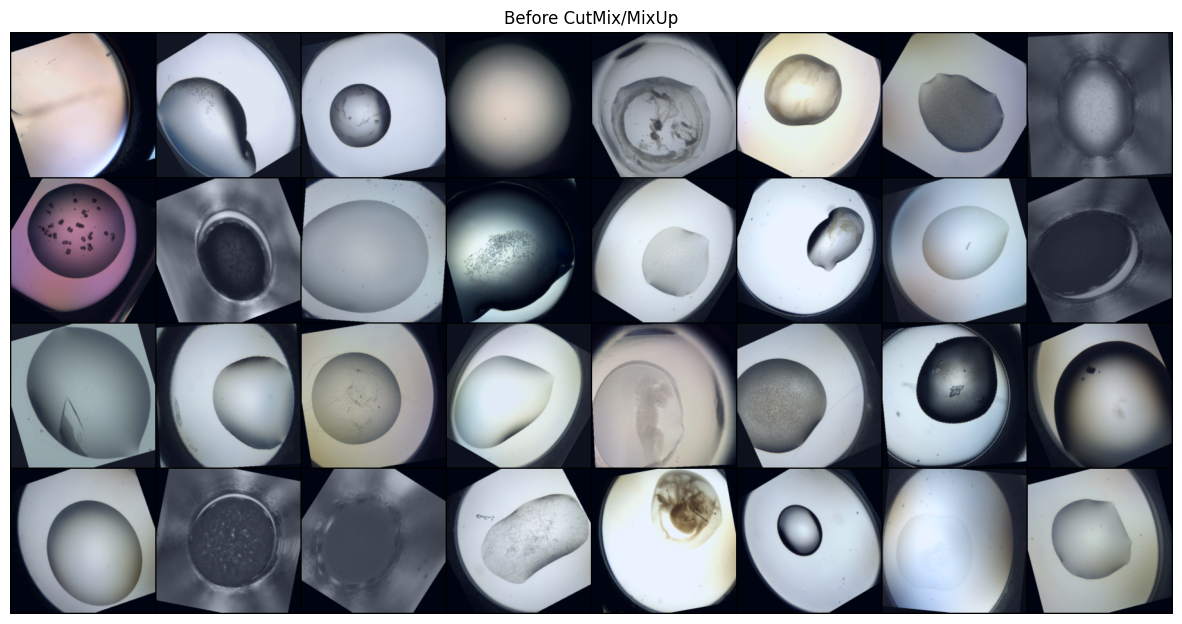

Class Labels for Before CutMix/MixUp:
['Clear', 'Crystals', 'Precipitate', 'Clear', 'Precipitate', 'Precipitate', 'Precipitate', 'Precipitate', 'Crystals', 'Precipitate', 'Clear', 'Crystals', 'Precipitate', 'Precipitate', 'Crystals', 'Precipitate', 'Crystals', 'Clear', 'Precipitate', 'Clear', 'Precipitate', 'Precipitate', 'Crystals', 'Precipitate', 'Clear', 'Precipitate', 'Precipitate', 'Crystals', 'Precipitate', 'Clear', 'Precipitate', 'Precipitate']
After CutMix/MixUp: images.shape = torch.Size([32, 3, 224, 224]), labels.shape = torch.Size([32, 4])


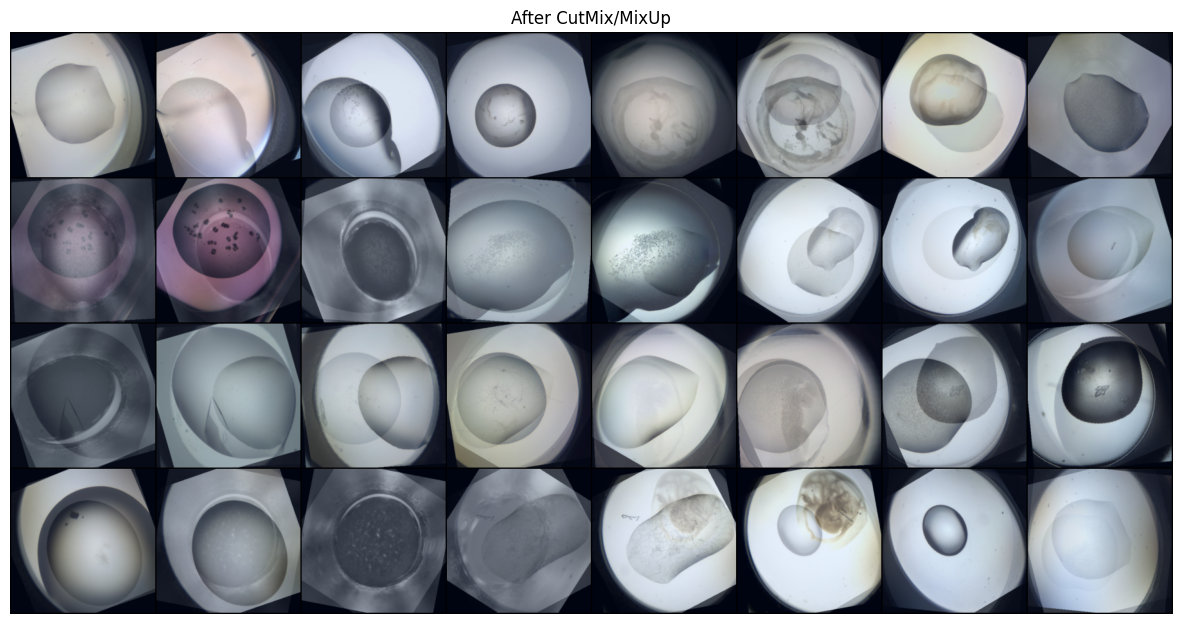

Class Labels for After CutMix/MixUp:
['Precipitate', 'Clear', 'Crystals', 'Precipitate', 'Clear', 'Precipitate', 'Precipitate', 'Precipitate', 'Precipitate', 'Crystals', 'Precipitate', 'Clear', 'Crystals', 'Precipitate', 'Precipitate', 'Crystals', 'Precipitate', 'Crystals', 'Clear', 'Precipitate', 'Clear', 'Precipitate', 'Precipitate', 'Crystals', 'Precipitate', 'Clear', 'Precipitate', 'Precipitate', 'Crystals', 'Precipitate', 'Clear', 'Precipitate']


In [30]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

def visualize_batch(images, labels, label_mapping, title="Batch Visualization"):
    """
    배치 이미지를 시각화하는 함수.

    Args:
        images (Tensor): (B, C, H, W) 형태의 이미지 텐서.
        labels (Tensor): (B,) 형태의 클래스 인덱스 텐서.
        label_mapping (dict): 클래스 인덱스를 문자열로 변환하는 매핑.
        title (str): 그래프 제목.
    """
    batch_size = images.shape[0]

    # 이미지 32개까지만 표시
    grid = make_grid(images[:min(batch_size, 32)], nrow=8, padding=2, normalize=True)
    
    # Tensor를 NumPy 배열로 변환
    grid_np = grid.permute(1, 2, 0).cpu().numpy()

    # Display the grid
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(grid_np)
    ax.axis("off")
    ax.set_title(title)
    plt.show()

    # 원-핫 인코딩된 경우 클래스 인덱스로 변환
    if labels.ndimension() > 1 and labels.shape[1] > 1:
        labels = labels.argmax(dim=1)  # One-hot to class index

    # 클래스 인덱스를 클래스 이름으로 변환
    class_labels = [label_mapping.get(int(labels[i].item()), "Unknown") for i in range(len(labels))]

    print(f"Class Labels for {title}:")
    print(class_labels)

# DataLoader에서 배치 증강 확인 및 시각화
for batch in load_dataset:
    images, labels, sources = batch  # DataLoader에서 (images, labels, sources) 튜플 언패킹

    print(f"Before CutMix/MixUp: images.shape = {images.shape}, labels.shape = {labels.shape}")

    # 원-핫 인코딩 여부 확인 후 변환
    if labels.ndimension() > 1 and labels.shape[1] > 1:
        labels = labels.argmax(dim=1)  # One-hot to class index

    # CutMix/MixUp 적용 전 시각화
    visualize_batch(images, labels, label_mapping, title="Before CutMix/MixUp")

    # CutMix 또는 MixUp 적용
    images, labels = cutmix_or_mixup(images, labels)

    print(f"After CutMix/MixUp: images.shape = {images.shape}, labels.shape = {labels.shape}")

    # CutMix/MixUp 적용 후 원-핫 인코딩 여부 다시 확인 후 변환
    if labels.ndimension() > 1 and labels.shape[1] > 1:
        labels = labels.argmax(dim=1)  # One-hot to class index

    # CutMix/MixUp 적용 후 시각화
    visualize_batch(images, labels, label_mapping, title="After CutMix/MixUp")

    break  # 첫 배치 확인 후 종료

In [ ]:
import seaborn as sns
def batch_statistics(dataloader: DataLoader, label_mapping: dict, source_mapping: dict) -> None:
    """
    Compute and visualize statistics of a batch.
    
    Args:
        dataloader (DataLoader): The DataLoader object.
        label_mapping (dict): Mapping of label IDs to class names.
        source_mapping (dict): Mapping of institute IDs to institute names.
    """
    # Get first batch
    images, labels, sources = next(iter(dataloader))

    # If labels are one-hot encoded, convert to class index
    if labels.ndimension() > 1 and labels.shape[1] > 1:
        labels = labels.argmax(dim=1)  # One-Hot을 클래스 인덱스로 변환

    # Convert tensors to lists for processing
    class_labels = [label_mapping.get(labels[i].item(), "Unknown") for i in range(len(labels))]
    source_labels = [source_mapping.get(sources[i].item(), "Unknown") for i in range(len(sources))]

    # Plot class distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x=class_labels, palette="Set2")
    plt.title("Class Distribution in Batch")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Plot institute distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x=source_labels, palette="muted")
    plt.title("Institute Distribution in Batch")
    plt.xlabel("Institute")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Print statistics
    print( "Batch Class Distribution:")
    for class_name in set(class_labels):
        count = class_labels.count(class_name)
        print(f"  {class_name}: {count} samples")

    print("Batch Source Distribution:")
    for inst_name in set(source_labels):
        count = source_labels.count(inst_name)
        print(f"  {inst_name}: {count} samples")


In [ ]:
source_mapping

{0: 'C3', 1: 'GSK', 2: 'HWI', 3: 'Merck', 4: 'BMS'}

In [ ]:
label_mapping

{0: 'Clear', 1: 'Crystals', 2: 'Other', 3: 'Precipitate'}

C:\Users\BDA_INT01\AppData\Local\Temp\ipykernel_21944\63461801.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=class_labels, palette="Set2")


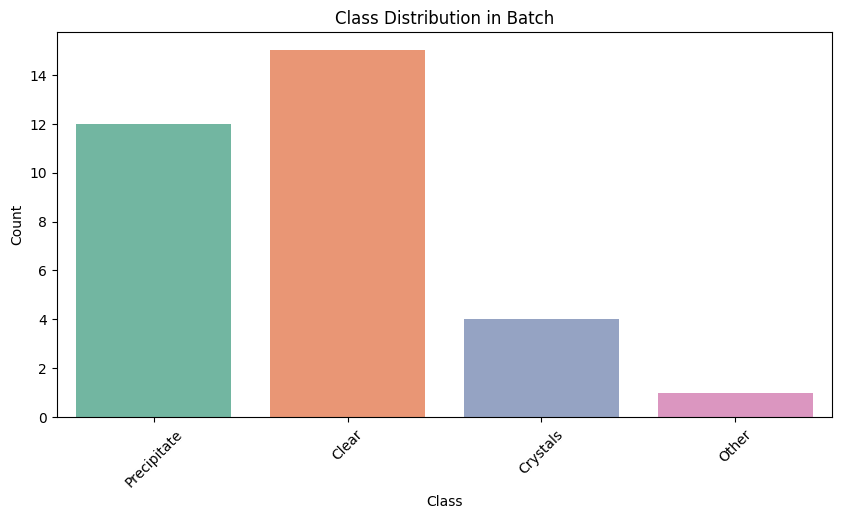

C:\Users\BDA_INT01\AppData\Local\Temp\ipykernel_21944\63461801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=source_labels, palette="muted")


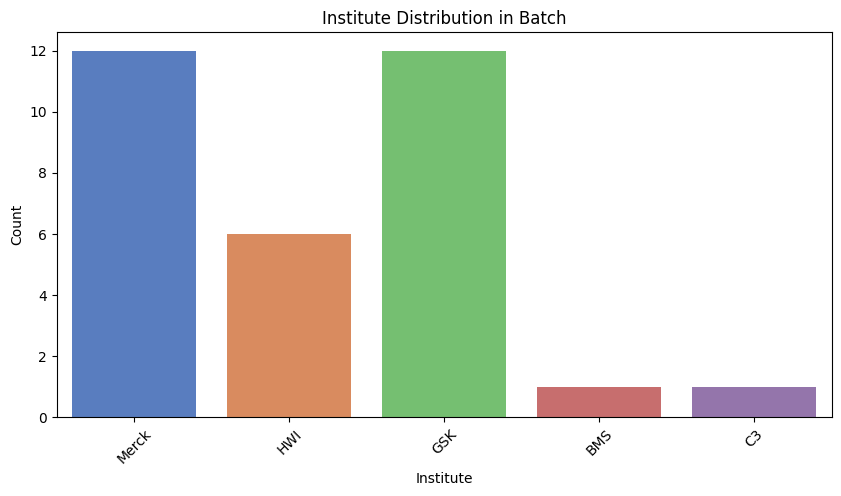

Batch Class Distribution:
  Crystals: 4 samples
  Other: 1 samples
  Clear: 15 samples
  Precipitate: 12 samples
Batch Source Distribution:
  C3: 1 samples
  HWI: 6 samples
  GSK: 12 samples
  Merck: 12 samples
  BMS: 1 samples


In [ ]:
batch_statistics(load_dataset, label_mapping, source_mapping)

In [ ]:
#Model

import torch.nn as nn
import torchvision.models as models
from sklearn.model_selection import train_test_split
from tqdm import tqdm

def get_model(model_name, num_classes=4, pretrained=True):
    if model_name == 'resnet':
        model = models.resnet50(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == 'inception':
        model = models.inception_v3(pretrained=pretrained, aux_logits=False)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == 'vgg':
        model = models.vgg16(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    return model

def train(model, loader, criterion, optimizer, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    pbar = tqdm(loader, desc="Training")
    for inputs, labels, _ in pbar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()
        total += labels.size(0)
        pbar.set_postfix_str(f"Batch accuracy : { (outputs.argmax(1) == labels).sum().item() / labels.size(0):.2f}")
    return running_loss / len(loader), correct / total

def validate(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels, _ in tqdm(loader, desc="Validating"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)
    return running_loss / len(loader), correct / total

if __name__ == "__main__":
    csv_path = "D:\Soyeon\Project\metadata_R.csv"  # 실제 CSV 파일 경로 입력
    df = pd.read_csv(csv_path)

    # Train / Validation 데이터 분할 (80:20)
    train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label_id'], random_state=42)
    print(f" Train 데이터: {len(train_df)}개, Validation 데이터: {len(val_df)}개")

    batch_size, num_classes = 128, len(df['label_id'].unique())
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    train_loader = DataLoader(CustomDataset(train_df, transform=transform), batch_size, shuffle=True)
    val_loader = DataLoader(CustomDataset(val_df, transform=transform), batch_size, shuffle=False)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_names = ['resnet', 'inception', 'vgg']
    best_model, best_acc = None, 0.0
    
    for name in model_names:
        print(f"\n{'='*30}\n{name.upper()} Training\n{'='*30}")
        model = get_model(name, num_classes, pretrained=False).to(device)
        criterion, optimizer = nn.CrossEntropyLoss(), torch.optim.Adam(model.parameters(), lr=0.001)
        for epoch in range(5):
            train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
            val_loss, val_acc = validate(model, val_loader, criterion, device)
            print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
            if val_acc > best_acc:
                best_acc, best_model = val_acc, model
    
    torch.save(best_model.state_dict(), "best_model.pth")
    print("\n Best model!")



 Train 데이터: 332620개, Validation 데이터: 83155개

RESNET Training


c:\Users\BDA_INT01\AppData\Local\miniconda3\envs\project_sy\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\BDA_INT01\AppData\Local\miniconda3\envs\project_sy\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Training:   2%|▏         | 39/2599 [03:04<3:16:48,  4.61s/it, Batch accuracy : 0.61]

In [ ]:
#model with 


In [ ]:
df['source_label'] = df['label'] + df['source_id'].astype(str)

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, stratify=df['source_label'])

In [ ]:
X_test

image_path        label  \
277407  D:\Soyeon\Project\MARCO\folderID718_plateID271...  Precipitate   
101737  D:\Soyeon\Project\MARCO\folderID647_plateID264...        Clear   
379751  D:\Soyeon\Project\MARCO\folderID634_plateID163...  Precipitate   
30584   D:\Soyeon\Project\MARCO\folderID570_plateID157...  Precipitate   
114362  D:\Soyeon\Project\MARCO\folderID349_plateID134...        Clear   
...                                                   ...          ...   
253435  D:\Soyeon\Project\MARCO\01ge_A2_ImagerDefaults...  Precipitate   
319032  D:\Soyeon\Project\MARCO\folderID287_plateID128...  Precipitate   
97102   D:\Soyeon\Project\MARCO\02p2_E12_ImagerDefault...  Precipitate   
309245  D:\Soyeon\Project\MARCO\00vs_E10_ImagerDefault...     Crystals   
207117  D:\Soyeon\Project\MARCO\folderID766_plateID176...        Clear   

                                                 filename  width  height  \
277407  folderID718_plateID2718_batchID14240_wellNum26...   1280     960   
101737  folderID647_plateID2647_batchID13388_wellNum31...   1280     960   
379751  folderID634_plateID1634_batchID6838_wellNum59_...   1280     960   
30584   folderID570_plateID1570_batchID6376_wellNum46_...   1280     960   
114362  folderID349_plateID1349_batchID4619_wellNum80_...   1280     960   
...                                                   ...    ...     ...   
253435                       01ge_A2_ImagerDefaults_3.jpg   1280     960   
319032  folderID287_plateID1287_batchID4392_wellNum68_...   1280     960   
97102                       02p2_E12_ImagerDefaults_3.jpg   1280     960   
309245                      00vs_E10_ImagerDefaults_7.jpg   1280     960   
207117  folderID766_plateID1766_batchID7390_wellNum5_p...   1280     960   

        source_id   label_text source  label_id  source_label  
277407          3  Precipitate  Merck         3  Precipitate3  
101737          3        Clear  Merck         0        Clear3  
379751          3  Precipitate  Merck         3  Precipitate3  
30584           3  Precipitate  Merck         3  Precipitate3  
114362          3        Clear  Merck         0        Clear3  
...           ...          ...    ...       ...           ...  
253435          1  Precipitate    GSK         3  Precipitate1  
319032          3  Precipitate  Merck         3  Precipitate3  
97102           1  Precipitate    GSK         3  Precipitate1  
309245          1     Crystals    GSK         1     Crystals1  
207117          3        Clear  Merck         0        Clear3  

[83155 rows x 10 columns]

<Axes: xlabel='source_id', ylabel='Count'>

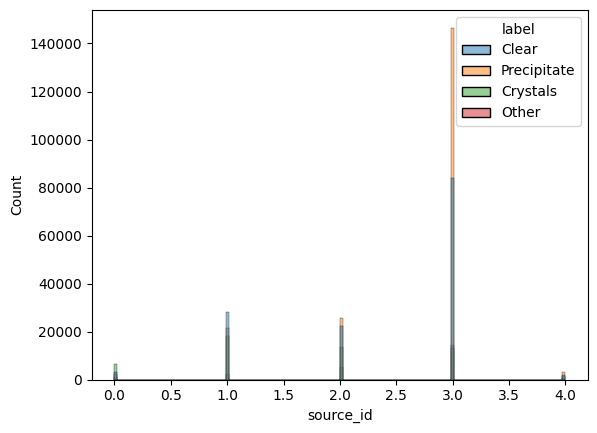

In [ ]:
sns.histplot(df, x='source_id', 
             hue='label')

<Axes: xlabel='source_id', ylabel='Count'>

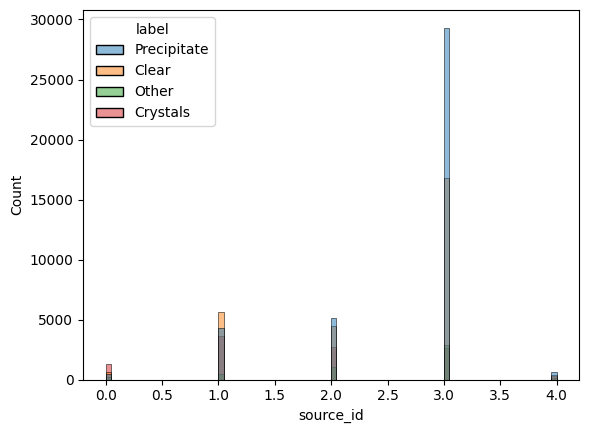

In [ ]:
sns.histplot(X_test, x='source_id', 
             hue='label')